# 자연어 처리(Natural Language Processing, NLP)

- 한국어, 영어 등 우리가 평소에 쓰는 언어

- 사람의 말을 컴퓨터가 이해하도록 수행하는 과정

## 신경망에서의 단어 처리 (단어 임베딩, Word Embedding)
- 단어를 있는 그대로 처리하지 않고 고정 길이의 벡터로 표현 (원-핫 인코딩)

- 단어 하나에 인덱스 정수를 할당하는 Bag of Words 방법

- 예시)  
  "you", "are", "not", "a", "smart", "student"

  - "you"     : 0
  - "are"     : 1
  - "not"     : 2
  - "a"       : 3
  - "smart"   : 4
  - "student" : 5

        "You are a smart student."  
    ---> [1, 1, 0, 1, 1, 1]

  <br>
  
  <img src="https://miro.medium.com/max/1348/1*YEJf9BQQh0ma1ECs6x_7yQ.png" width="600">

  <sub>출처: https://medium.com/@athif.shaffy/one-hot-encoding-of-text-b69124bef0a7</sub>

## 신경망에서의 단어처리 구조

<img src="https://miro.medium.com/max/1000/1*1O5gLhOg25HviI8bwZxV4g.png" width="600">

<sub>출처: https://mc.ai/deep-nlp-word-vectors-with-word2vec/</sub>

## CBOW (Continuous Bag of Words) Embedding
- 복수 단어 문맥(multi-word context)에 대한 문제  
  즉, 여러개의 단어를 나열한 뒤 이와 관련된 단어를 추정하는 문제

- 예를 들어,  
      Betty bought a bit of better butter.

  위 예시에서 (Betty, a bit, butter)라는 문맥이 주어지면 bought를 예측하는 구조

  <br>

  <img src="https://miro.medium.com/max/604/1*DfuBd49nCtT99h328iXL2Q.png" width="300">

  <sub>출처: https://medium.com/@srishtee.kriti/mathematics-behind-continuous-bag-of-words-cbow-model-1e54cc2ecd88</sub>

## Skip-Gram Embedding
- CBOW 방식과 반대

- 특정한 단어로부터 문맥이 될 수 있는 단어를 예측

- 보통 입력 단어 주변의  $k$ 개 단어를 문맥으로 보고 예측 모형을 만드는데 이  $k$ 값을 window size 라고 한다.

- 예시) window size = 2 라면,  
      Betty -> bought, butter  
      bought -> butter, Betty  
      a -> bit, of  

  <br>

  <img src="https://www.researchgate.net/publication/322905432/figure/fig1/AS:614314310373461@1523475353979/The-architecture-of-Skip-gram-model-20.png" width="300">

  <sub>출처: https://www.researchgate.net/figure/The-architecture-of-Skip-gram-model-20_fig1_322905432</sub>

## Word2Vec
- CBOW, Skip_Gram 방식의 단어 임베딩을 구현.  
  구글의 Mikolov 개발

- subsampling, negative sampling 등의 기법 추가하여 학습 속도 향상

  <img src="https://mbenhaddou.com/wp-content/uploads/2019/12/img_4.png">

  <sub>출처: http://mbenhaddou.com/2019/12/14/word2vec-concepts-from-scratch/</sub>

  <br>

  <img src="https://miro.medium.com/max/2456/1*gcC7b_v7OKWutYN1NAHyMQ.png" width="600">

  <sub>출처: https://towardsdatascience.com/word-embeddings-for-nlp-5b72991e01d4</sub>

## Word2Vec 예제

- 출처: https://datascienceschool.net/view-notebook/6927b0906f884a67b0da9310d3a581ee/

In [1]:
import nltk
nltk.download('movie_reviews')
nltk.download(('punkt'))

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from nltk.corpus import movie_reviews
sentences = [list(s) for s in movie_reviews.sents()]

In [3]:
sentences[0]

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.']

In [4]:
from gensim.models.word2vec import Word2Vec 

In [5]:
model = Word2Vec(sentences)

In [6]:
model.init_sims(replace=True)
# 모델의 초기화를 위해서 사용한다. 불필요 메모리를 릴리즈해주는 것이다.

In [7]:
model.wv.similarity('fruit', 'apple')
# 과일과 애플 사이의 얼마의 유사성이 있는지를 보여준다.

0.891619

In [8]:
model.wv.similarity('he', 'she')

0.8522488

In [9]:
model.wv.similarity('fruit', 'he')
# 유사성이 거의 없다.

0.11909743

In [10]:
model.wv.most_similar('fruit')
# 연관성이 가장 높은 단어들을 추천한다.

[('facade', 0.9533759355545044),
 ('buffalo', 0.9511509537696838),
 ('sporty', 0.9509344100952148),
 ('aires', 0.9437854886054993),
 ('virgin', 0.9428814649581909),
 ('yuppie', 0.942832350730896),
 ('atomic', 0.9428005218505859),
 ('min', 0.9427353739738464),
 ('ing', 0.9427350759506226),
 ('capital', 0.9417742490768433)]

In [11]:
model.wv.most_similar('student')

[('teacher', 0.9326225519180298),
 ('artist', 0.9150644540786743),
 ('reporter', 0.9087880253791809),
 ('scientist', 0.9045549631118774),
 ('editor', 0.9033676981925964),
 ('millionaire', 0.8993880748748779),
 ('exec', 0.8945790529251099),
 ('neighbor', 0.8942198753356934),
 ('housewife', 0.8933291435241699),
 ('worker', 0.8914688229560852)]

In [12]:
model.wv.most_similar(positive=["she", 'king'], negative='queen', topn=1)
# he라는 단어를 추천한다.

[('us', 0.22904382646083832)]

In [13]:
model.wv.most_similar(positive=["ship", 'sky'], negative='sea', topn=1)

[('attack', 0.6300050020217896)]

In [14]:
from sklearn.manifold import TSNE 

tsne = TSNE(n_components=2)

In [15]:
review_vocab = model.wv.vocab 
review_similarity = model[review_vocab]
review_similarity 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 0.14312106, -0.03709722,  0.08746097, ..., -0.082114  ,
        -0.05347323,  0.06693382],
       [-0.08521772, -0.10852288, -0.20482835, ...,  0.13426489,
         0.15220979,  0.01893849],
       [ 0.09825732, -0.19124591, -0.01582356, ..., -0.04500116,
        -0.0336478 ,  0.07566093],
       ...,
       [ 0.16398111,  0.06263331, -0.02544432, ...,  0.02067351,
         0.00506029, -0.08485808],
       [ 0.16305983,  0.04887366, -0.07142385, ...,  0.02487123,
         0.08885511, -0.11007737],
       [ 0.0986592 ,  0.020837  , -0.07319201, ..., -0.04933205,
         0.0872575 , -0.1293753 ]], dtype=float32)

In [16]:
import pandas as pd  

similarity = tsne.fit_transform(review_similarity)
review_df = pd.DataFrame(similarity, index=review_vocab, columns=['x', 'y'])
review_1000 = review_df[:1000]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


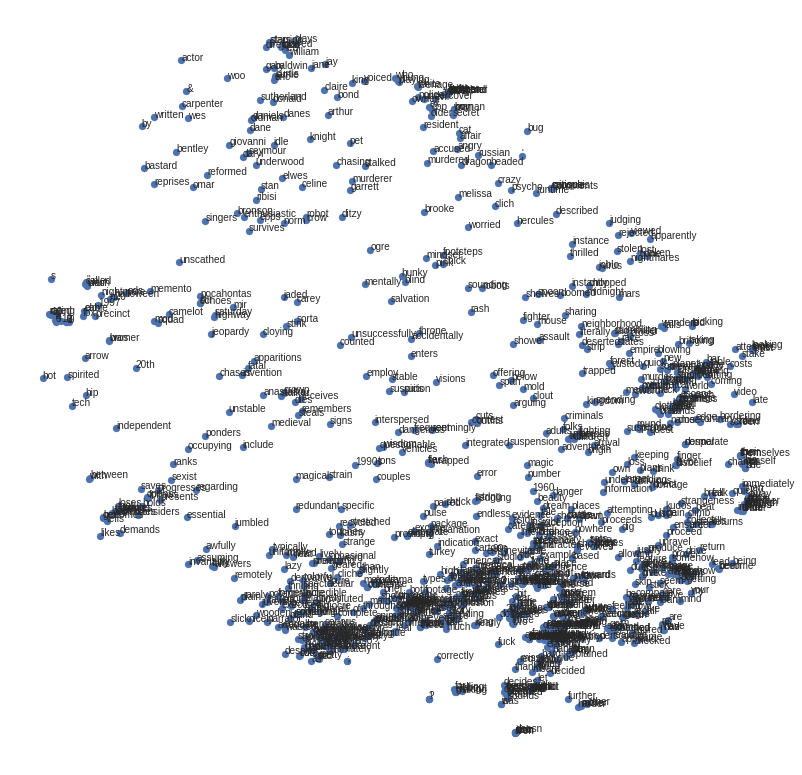

In [17]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

fig = plt.figure(figsize=(14, 14)) 
ax = fig.add_subplot(1, 1, 1)
ax.scatter(review_1000['x'], review_1000['y'])

for word, pos in review_1000.iterrows():
    ax.annotate(word, pos)

ax.axis('off')
plt.show()

### 네이버 영화 감상 코퍼스를 사용한 한국어 단어 임베딩
- 한국어 임베딩은 "konlpy" 필요

In [18]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family = 'NanumBarunGothic')
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [19]:
!wget = nc http://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt

--2022-08-07 07:00:17--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2022-08-07 07:00:17--  http://nc/
Resolving nc (nc)... failed: No address associated with hostname.
wget: unable to resolve host address ‘nc’
--2022-08-07 07:00:17--  http://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt [following]
--2022-08-07 07:00:17--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1462880

In [20]:
import codecs 

def read_data(filename):
    with codecs.open(filename, encoding='utf8', mode='r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]
    return data

train_data = read_data('ratings_train.txt')

In [21]:
!pip3 install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 75.3 MB/s 
     |████████████████████████████████| 453 kB 58.1 MB/s 


In [22]:
from konlpy.tag import Okt 
tagger = Okt()
# 오픈 코리안 텍스트 : 형태소 분석기이다.
# 형태소 분석기를 사용하면 원하는 품사나 단어를 가져올 수 있다.
def tokenize(doc):
    return ['/'.join(t) for t in tagger.pos(doc, norm=True, stem=True)]
    # 현재 형태소를 가져오도록 메서드를 사용함.

train_docs = [row[1] for row in train_data]
print(train_docs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [32]:
sentences = [tokenize(d) for d in train_docs]

In [34]:
from gensim.models import word2vec 

In [35]:
model = word2vec.Word2Vec(sentences)
model.init_sims(replace=True)

In [36]:
model.wv.similarity(*tokenize(u'배우 여배우'))

0.72785866

In [37]:
model.wv.similarity(*tokenize(u'배우 남자'))
# 주어진 문장들로 학습한 결과에 따르면 서로 연관성이 낮은 단어의 집합이다.

0.2568331

In [38]:
model.wv.most_similar(tokenize(u'배우 남자'))
# 가장 연관성이 높은 목록별로 보여준다.

[('여배우/Noun', 0.8176401853561401),
 ('여자/Noun', 0.7796115875244141),
 ('연기자/Noun', 0.7689056396484375),
 ('캐릭터/Noun', 0.7226442098617554),
 ('조연/Noun', 0.6975823640823364),
 ('남자배우/Noun', 0.6894387602806091),
 ('가수/Noun', 0.6866392493247986),
 ('출연자/Noun', 0.6811671853065491),
 ('악역/Noun', 0.678612470626831),
 ('등장인물/Noun', 0.6743400692939758)]

In [39]:
model.wv.most_similar(tokenize(u'감독'))

[('작가/Noun', 0.6889058351516724),
 ('김기덕/Noun', 0.6083996295928955),
 ('능력/Noun', 0.5742776393890381),
 ('목사/Noun', 0.5676138401031494),
 ('제작/Noun', 0.5670708417892456),
 ('역량/Noun', 0.5636395215988159),
 ('본인/Noun', 0.5562132000923157),
 ('각본/Noun', 0.5420442223548889),
 ('영화감독/Noun', 0.5170774459838867),
 ('의심스럽다/Adjective', 0.5139690637588501)]

In [40]:
model.wv.most_similar(tokenize(u'액션'))

[('스케일/Noun', 0.7290228605270386),
 ('코믹/Noun', 0.7133570909500122),
 ('그래픽/Noun', 0.6705724000930786),
 ('긴장감/Noun', 0.652989387512207),
 ('영상/Noun', 0.6483317017555237),
 ('액션씬/Noun', 0.6448810696601868),
 ('볼거리/Noun', 0.6343841552734375),
 ('화려하다/Adjective', 0.619819164276123),
 ('구성/Noun', 0.618323564529419),
 ('호러/Noun', 0.6176981925964355)]

In [43]:
from konlpy.utils import pprint 

# pprint(model.wv.most_similar(positive=tokenize(u'남자 여배우'), negative=tokenize(u'배우'), topn=1))
pprint(model.wv.most_similar(positive=tokenize(u'남자 여배우'), negative=tokenize(u'배우'), topn=3))
# 남자 여배우에서 배우를 빼면 어떤 것을 생각할 수 있나?

[('여자/Noun', 0.8222894668579102),
 ('꼬마/Noun', 0.7611626982688904),
 ('여자애/Noun', 0.7559192776679993)]


In [44]:
review_vocab = model.wv.vocab 
review_similarity = model[review_vocab]
review_similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-0.08244057,  0.01114167, -0.07642503, ...,  0.07554015,
        -0.06321606, -0.12863332],
       [-0.04838745,  0.04794809, -0.0478975 , ..., -0.09484006,
         0.00365815, -0.19678551],
       [-0.08797441,  0.11266179, -0.00471133, ..., -0.01262117,
        -0.1558554 ,  0.01111716],
       ...,
       [ 0.01062233, -0.01567141, -0.06670292, ...,  0.03152355,
        -0.1322961 , -0.23886319],
       [-0.12844771,  0.04239725, -0.00213018, ...,  0.13037744,
        -0.04617983, -0.09567995],
       [-0.04766352, -0.05151891, -0.08572455, ..., -0.09113938,
        -0.00962177,  0.00477331]], dtype=float32)

In [46]:
from sklearn.manifold import TSNE
import pandas as pd 

tsne = TSNE(n_components=2)
similarity = tsne.fit_transform(review_similarity)
review_df = pd.DataFrame(similarity, index=review_vocab, columns=['x', 'y'])
review_1000 = review_df[:1000]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(review_1000['x'], review_1000['y'])

for word, pos in review_1000.iterrows():
    ax.annotate(word, pos)
ax.axis('off')

# 순환 신경망 (Recurrent Neural Network, RNN)

- **순서가 있는 데이터**를 입력으로 받음

- 변화하는 입력에 대한 출력을 얻음

- 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터** 

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망

  - 입력 → 은닉 → 출력층 으로 이어지는 단방향 구조

  - 이전 스텝의 출력의 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조

  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  

  - 현재 상태가 이전 상태에 종속

  <br>

  <img src="https://www.researchgate.net/profile/Engin_Pekel/publication/315111480/figure/fig1/AS:472548166115333@1489675670530/Feed-forward-and-recurrent-ANN-architecture.png">

  <sub>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</sub>



## 순환 신경망 구조

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="700">

<br>

- 입력 $x_t$에서 $t$는 시각을 뜻함

- $X_0$에 대한 출력 $Y_0$이 다음 레이어에 전달

- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

## 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- one to one
  - RNN

- one to many
  - Image Captioning 

  - 이미지에 대한 설명 생성

- many to one
  - Sentiment Classification

  - 문장의 긍정/부정을 판단하는 감정 분석

- many to many
  - Machine Translation

  - 하나의 언어를 다른 언어로 번역하는 기계 번역

- many to many
  - Video Classification(Frame Level)




## 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치

- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치

- $h$는 '상태'를 기억

- $h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## BPTT(BackPropagation Through Time)

- 시간 방향으로 펼친 신경망의 오차역전파

- 시계열 데이터의 시간 크기가 커지면 역전파 시 불안정해짐

- 기울기 소실 문제 발생

  <img src="https://iamtrask.github.io/img/backprop_through_time.gif" width="700">

  <sub>출처: https://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/</sub>

## Truncated BPTT

- 큰 시계열 데이터를 다룰 때 사용하는 오차역전파법

- 신경망을 **적당한 길이로 끊는다.**
  - <u>역전파에 연결만! 순전파의 연결은 끊어지지 않는다.</u>

- 학습 시, 입력이 **순서대로 연결**되어 입력해야 함

  <img src="https://r2rt.com/static/images/RNN_true_truncated_backprop.png">

  <sub>출처: https://r2rt.com/styles-of-truncated-backpropagation.html</sub>


## RNN 구현

- 형상 주의!

## $\qquad \ h_{t-1} W_h \ + \ x_t W_x = h_t$

- $h_{t-1}$ : $N \times H$

- $W_{h}$ : $H \times H$

- $x_{t}$ : $N \times D$

- $W_{x}$ : $D \times H$

- $h_t$ : $N \times H$

- $D$ : 입력 벡터의 차원 수

- $H$ : 은닉 상태 벡터의 차원 수


In [47]:
import numpy as np 

class RNN:

    def __init__(self, W_x, W_h, bias):
        self.params = [W_x, W_h, bias]
        self.grads = [np.zeros_like(W_x), np.zeros_like(W_h), np.zeros_like(bias)]
        self.temp = None 

    def forward(self, input_data, h_prev):
        W_x, W_h, bias = self.params
        t = np.matmul(h_prev, W_h) + np.matmul(input_data, W_x)
        h_next = np.tanh(t)

        self.temp = (input, h_prev, h_next)
        return h_next
    
    def backward(self, dh_next):
        W_x, W_h, bias = self.params
        input_data, h_prev, h_next = self.temp 

        dt = dh_next * (1 - h_next**2)
        db = np.sum(dt, axis=0)
        dWh = np.matmul(h_prev.T, dt)
        dh_prev = np.matmul(dt, W_h.T)
        dWx = np.matmul(input_data.T, dt)
        dx = np.matmul(dt, W_x.T)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        return dx, dh_prev

## Time RNN Layer
- RNN 계층의 은닉상태 $h$를 가지고 있음
 

In [48]:
class TimeRNN:

    def __init__(self, W_x, W_h, bias, stateful = False):
        self.params = [W_x, W_h, bias]
        self.grads = [np.zeros_like(W_x), np.zeros_like(W_h), np.zeros_like(bias)]
        self.layers = None 
        self.hidden_state = None 
        self.dh = None 
        self.stateful = stateful 
    
    def set_state(self, hidden_state):
        self.hidden_state = hidden_state 

    def reset_state(self):
        self.hidden_state = None 

    def forward(self, input_data):
        W_x, W_h, bias = self.params
        N, T, D = input_data.shape 
        D, H = W_x.shape 

        self.layers = [] 
        output = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.hidden_state is None:
            self.hidden_state = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = RNN(*self.params)
            self.hidden_state = layer.forward(input_data[:, t, :], self.h)
            output[:, t, :] = self.hidden_state
            self.layers.append(layer)
                               
        return output

    def backward(self, doutput):
        W_x, W_h, bias = self.params
        N, T, H = doutput.shape 
        D, H = W_x.shape 

        dinput = np.empty((N, T, D), dtype='f')
        dh = 0
        grads = [0, 0, 0]

        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(doutput[:, t, :] + dh)
            dinput[:, t, :] = dx

            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad

        self.dh = dh 

        return dinput

# LSTM (Long Shot-Term Memory)

- RNN은 장기 기억을 제대로 처리 못함

- RNN은 기울기 소실 또는 기울기 폭발을 발생

- 위를 해결하기 위해 LSTM 방법 등장

  <img src="https://www.researchgate.net/publication/324600237/figure/fig3/AS:616974623178753@1524109621725/Long-Short-term-Memory-Neural-Network.png" width="600">

<sub>출처: https://www.researchgate.net/figure/Long-Short-term-Memory-Neural-Network_fig3_324600237</sub>

### $\qquad f = \sigma (x_t W^{(f)}_x + h_{t-1} W^{(f)}_h + b^{(f)}) \\ 
\qquad g = tanh(x_t W^{(g)}_x + h_{t-1} W^{(g)}_h + b^{(g)}) \\
\qquad i = \sigma(x_t W^{(i)}_x + h_{t-1} W^{(i)}_h + b^{(i)}) \\
\qquad o = \sigma(x_t W^{(o)}_x + h_{t-1} W^{(o)}_h + b^{(o)})$


### $\qquad c_t = f \odot c_{t-1} + g \odot i \\
\qquad h_t = o \odot tanh(c_t)
$


## forget gate (망각 게이트)
- 불필요한 정보를 잊는 게이트

-  $h_{t−1}$ 과 $x_t$ 를 받아 시그모이드를 취해준 값이 forget gate의 출력값

- 시그모이드 함수를 통과하기 때문에 그 값이 0이라면 이전 상태의 정보는 잊고, 1이라면 이전 상태의 정보를 온전히 기억

  <img src="https://image.slidesharecdn.com/dlsl2017d2l2recurrentneuralnetworksi-170125171004/95/recurrent-neural-networks-i-d2l2-deep-learning-for-speech-and-language-upc-2017-25-638.jpg?cb=1485365064" width="600">

  <sub>출처: https://www.slideshare.net/xavigiro/recurrent-neural-networks-1-d2l2-deep-learning-for-speech-and-language-upc-2017</sub>

## input gate (입력 게이트)
- 현재 정보를 기억하기’ 위한 게이트

- $h_{t−1}$ 과 $x_t$를 받아 $Sigmoid$ -> $tanh$ 를 통과한 다음,  
  Hadamard product 연산을 한 값을 출력
  
  <br>

  <img src="https://image.slidesharecdn.com/dlmmdcud2l08recurrentneuralnetworks-170429103823/95/recurrent-neural-networks-d2l8-insightdcu-machine-learning-workshop-2017-28-638.jpg?cb=1493462658" width="600">

  <sub>출처: https://www.slideshare.net/xavigiro/recurrent-neural-networks-1-d2l2-deep-learning-for-speech-and-language-upc-2017</sub>

## output gate (출력 게이트)

- 은닉 상태 $h_t$의 출력을 담당하는 게이트

- 입력 $x_t$와 이전 상태 $h_{t-1}$로부터 게이트의 열림 상태가 결정됨

  <img src="https://image.slidesharecdn.com/dlcvd2l6recurrentneuralnetworks-160802094750/95/deep-learning-for-computer-vision-recurrent-neural-networks-upc-2016-30-638.jpg?cb=1470131837" width="600">

<sub>출처: https://www.slideshare.net/xavigiro/deep-learning-for-computer-vision-recurrent-neural-networks-upc-2016</sub>

## LSTM 구현

In [50]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

class LSTM:
    def __init__(self, W_x, W_h, bias):
        self.params = [W_x, W_h, bias]
        self.grads = [np.zeros_like(W_x), np.zeros_like(W_h), np.zeros_like(bias)]
        self.temps = None 

    def forward(self, x, h_prev, c_prev):
        W_x, W_h, bias = self.params
        N, H = h_prev.shape 
        
        A = np.dot(x, W_x) + np.dot(h_prev, W_h) + bias 

        f = A[:, :H]
        g = A[:, H:2*H]
        i = A[:, 2*H:3*H]
        o = A[:, 3*H:]

        f = sigmoid(f)
        g = np.tanh(g)
        i = sigmoid(i)
        o = sigmoid(o)

        c_next = f * c_prev + g * i
        h_next = o * np.tanh(c_next)

        self.temp = (x,h_prev, c_prev, i, f, h, o, c_next)

        return h_next, c_next

    def backward(self, dh_next, dc_next):
        
        W_x, W_h, bias = self.params 
        x, h_prev, c_prev, i, f, h, o, c_next = self.temp 

        tanh_c_next = np.tanh(c_next)

        ds = dc_next + (dh_next * c) * (1 - tanh_c_next ** 2)
        dc_prev = ds * f 

        di = ds * g
        df = ds * c_prev 
        do = dh_next * tanh_c_next 
        dg = ds * id 

        di *= i * (1-i)
        df *= f * (1-f)
        do *= o * (1-o)
        dg *= (1 - g**2)

        dA = np.hstack((df, dg, di, do))

        dWh = np.dot(h_prev.T, dA)
        dWx = np.dot(x.T, dA)
        db = dA.sum(axis=0)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db 

        dx = np.dot(dA, W_x.T)
        dh_prev = np.dot(dA, W_h.T)

        return dx, dh_prev, dc_prev

# GRU (Gated Recurrent Unit)
- LSTM을 더 단순하게 만든 구조

- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- update gate
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함
  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub>출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>

  ### $\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\ 
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$


# (참고) RNN vs LSTM vs GRU

<img src="https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_1849/http://dprogrammer.org/wp-content/uploads/2019/04/RNN-vs-LSTM-vs-GRU.png">

<sub>출처: http://dprogrammer.org/rnn-lstm-gru</sub>